# SMAI ASSIGNMENT 3
### Srujana Vanka - 2020102005

# 1 Multinomial Logistic Regression

## 1.1 Dataset Analysis and Preprocessing 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing CSV file 
import os
import sys
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('/home/sruj/Downloads/WineQT.csv')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [44]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

### 1. Describe the dataset using mean, standard deviation, min, and max values for all attributes.

In [45]:
# Using describe() function in Pandas will provide summary statistics
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 2. Draw a graph that shows the distribution of the various labels across the entire dataset.

Text(0, 0.5, 'Count')

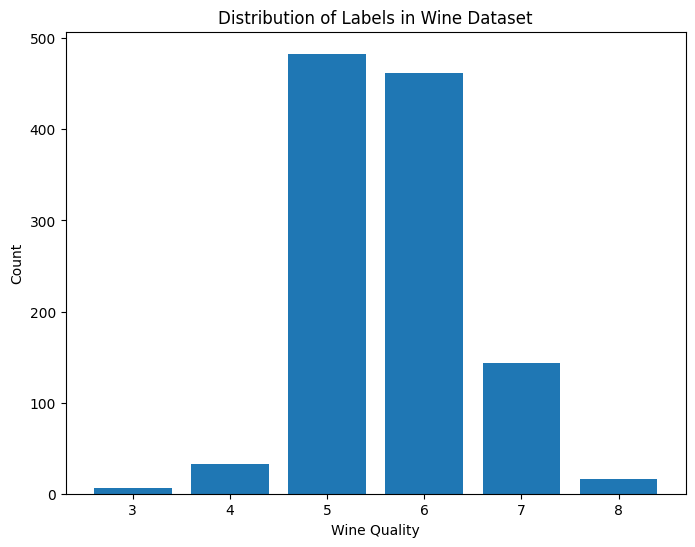

In [109]:
# Assuming 'label' is the column you want to visualize
label_counts = wine_data['quality'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(label_counts.index, label_counts.values)
plt.title('Distribution of Labels in Wine Dataset')
plt.xlabel('Wine Quality')
plt.ylabel('Count')

### 3. Partition the dataset into train, validation, and test sets.

In [116]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Split the data into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### 4. Normalise and standarize the data.

In [48]:
# To check if there are any missing values 
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Initialize a standard scaler object
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

**No null values in the data**

### 5. Clearly identify and justify the selection of the two most significant features

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X_standardized)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance of PC1:", explained_variance[0])
print("Explained Variance of PC2:", explained_variance[1])

Explained Variance of PC1: 0.27194408610222853
Explained Variance of PC2: 0.15872089192863997


**The components with the highest explained variance are the most significant features.** <br>
To identify the two most significant features, examine the explained variance of each principal component. The explained variance indicates how much of the total variance in the data is captured by each component.

## 1.2 Model Building from Scratch

### 1. Create a Multinomial Logistic Regression model from scratch and Use log loss i.e. cross entropy loss as loss function and Gradient descent as the optimization algorithm (write seperate methods for these).

In [51]:
import numpy as np

class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        
        # Initialize weights and bias
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        # One-hot encoding of target labels
        y_one_hot = self.one_hot_encoding(y, num_classes)

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.softmax(linear_model)
            
            # Compute gradient
            gradient_w = self.compute_gradient(X, predictions, y_one_hot)
            gradient_b = self.compute_bias_gradient(predictions, y_one_hot)

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(linear_model)
        return np.argmax(predictions, axis=1)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def one_hot_encoding(self, y, num_classes):
        num_samples = len(y)
        y_one_hot = np.zeros((num_samples, num_classes))
        for i in range(num_samples):
            y_one_hot[i, y[i]] = 1
        return y_one_hot

    def compute_gradient(self, X, predictions, y_one_hot):
        num_samples = len(y_one_hot)
        return np.dot(X.T, (predictions - y_one_hot)) / num_samples

    def compute_bias_gradient(self, predictions, y_one_hot):
        num_samples = len(y_one_hot)
        return np.sum(predictions - y_one_hot, axis=0) / num_samples

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)


###  2. Train the model, use sklearn classification report and print metrics on the validation set while training. Also, report loss and accuracy on train set.

In [126]:
from sklearn.metrics import classification_report, accuracy_score

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000)

# Training loop
for iteration in range(model.num_iterations):
    model.fit(X_train, y_train)

    if iteration % 10 == 0:
        # Periodically evaluate the model on the validation set
        y_pred_val = model.predict(X_validation)
        validation_accuracy = accuracy_score(y_validation, y_pred_val)
        
        # Calculate cross-entropy loss on the training set
        y_pred_train = model.predict(X_train)
        y_one_hot_train = model.one_hot_encoding(y_train, num_classes)
        training_loss = model.cross_entropy_loss(y_one_hot_train, model.softmax(np.dot(X_train, model.weights) + model.bias))
        training_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_val = model.predict(X_validation)
print("Classification Report on Validation Set:")
print(classification_report(y_validation, y_pred_val))


Classification Report on Validation Set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.66      0.81      0.72        93
           6       0.62      0.64      0.63        97
           7       0.64      0.31      0.42        29
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.32      0.29      0.30       229
weighted avg       0.61      0.64      0.61       229

Training Loss: 0.8744
Training Accuracy: 62.77%


## 1.3 Hyperparameter Tuning and Evaluation

### 1. Use your validation set and W&B logging to fine-tune the hyperparameters ( learning rate , epochs) for optimal results.

In [129]:
import wandb

# Initialize W&B 
wandb.init(project="assignment3-smai")

def train_model(learning_rate, epochs):
    model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_pred)

    # Log metrics to W&B
    wandb.log({"learning_rate": learning_rate, "epochs": epochs, "validation_accuracy": accuracy})

    return accuracy

# Hyperparameter search space
hyperparameter_search = {
    "learning_rate": [0.01, 0.1, 1.0],
    "epochs": [100, 500, 1000]
}

# Grid search or random search to find the best hyperparameters
best_accuracy = 0
best_hyperparameters = {}

for lr in hyperparameter_search["learning_rate"]:
    for epoch in hyperparameter_search["epochs"]:
        accuracy = train_model(lr, epoch)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {"learning_rate": lr, "epochs": epoch}

print("Best Hyperparameters:", best_hyperparameters)


epochs,▁▁▂█▁▁▂█▁▁▂█▁▁▂█
learning_rate,▁▁▁▁▁▁▁▁▂▂▂▂████
validation_accuracy,▃▁▁▁▁▁▁▁█▆▆▆████
epochs,10000
learning_rate,1.0
validation_accuracy,0.63755


/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Hyperparameters: {'learning_rate': 0.1, 'epochs': 100}


/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Evaluate your model on test dataset and print sklearn classification report.

In [123]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)

# Print the classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report on Test Set:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.62      0.70      0.66        97
           6       0.53      0.56      0.54        93
           7       0.53      0.38      0.44        26
           8       0.00      0.00      0.00         4

    accuracy                           0.57       229
   macro avg       0.33      0.33      0.33       229
weighted avg       0.53      0.57      0.55       229



# 2. Multi Layer Perceptron Classification

## 2.1 Model Building from Scratch

In [1]:
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [2]:
class MLPClassifier:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation='relu', optimizer='sgd', learning_rate=0.01, batch_size=None):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.batch_size = batch_size 

        # # Print statements for architecture verification
        # print(f"Input Size: {input_size}")
        # print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
        # print(f"Output Size: {output_size}")

        # Initialize activation functions and derivatives
        if activation == 'sigmoid':
            self.activation_function = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation_function = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation_function = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Invalid activation function")

        # Initialize optimizer
        if optimizer == 'sgd':
            self.optimizer = SGD(learning_rate)
        elif optimizer == 'bgd':
            self.optimizer = BatchGD(learning_rate)
        elif optimizer == 'mbgd':
            self.optimizer = MiniBatchGD(learning_rate, batch_size)
        else:
            raise ValueError("Invalid optimizer")

        self.weights, self.biases = self.initialize_weights()
        
    def initialize_weights(self):
        layer_sizes = [self.input_size] + self.hidden_layer_sizes + [self.output_size]
        weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)]
        biases = [np.zeros((1, layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]  # Correct bias shapes
        return weights, biases


    def forward_propagation(self, X):
        activations = [X]
        layer_inputs = []

        for i in range(len(self.weights)):
            layer_input = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            layer_inputs.append(layer_input)
            activation = self.activation_function(layer_input)
            activations.append(activation)

        return activations, layer_inputs

    
    def back_propagation(self, X, y, activations, layer_inputs):
        m = X.shape[0]
        deltas = [None] * len(self.weights)
        
        # To handle non-one-hot encoded labels
        if y.ndim == 1:
            y_one_hot = np.zeros((m, self.output_size))
            y_one_hot[np.arange(m), y] = 1
        else:
            y_one_hot = y
    
        deltas[-1] = (activations[-1] - y_one_hot) / m
    
        for i in range(len(deltas) - 2, -1, -1):
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * self.activation_derivative(activations[i+1])
    
        # Compute gradients
        gradients = [np.dot(activations[i].T, deltas[i]) for i in range(len(deltas))]
        bias_gradients = [np.sum(d, axis=0) for d in deltas]

        return gradients, bias_gradients


    def train(self, X, y, epochs, batch_size=None):
        m = X.shape[0]

        if batch_size is None:
            batch_size = m

        for epoch in range(epochs):
            for i in range(0, m, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                activations, layer_inputs = self.forward_propagation(X_batch)
                gradients, bias_gradients = self.back_propagation(X_batch, y_batch, activations, layer_inputs)

                for j in range(len(self.weights)):
                    self.weights[j] = self.optimizer.update(self.weights[j], gradients[j])
                    self.biases[j] = self.optimizer.update(self.biases[j], bias_gradients[j])

    def predict(self, X):
        activations, _ = self.forward_propagation(X)
        return activations[-1]

In [3]:
# Optimization Algorithms
class SGD:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def update(self, parameter, gradient):
        return parameter - self.learning_rate * gradient

class BatchGD:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def update(self, parameter, gradient):
        return parameter - self.learning_rate * gradient

class MiniBatchGD:
    def __init__(self, learning_rate, batch_size):
        self.learning_rate = learning_rate
        self.batch_size = batch_size

    def update(self, parameter, gradient):
        return parameter - self.learning_rate * gradient

## 2.2 Model Training & Hyperparameter Tuning using W&B

### 2. Report metrics: accuracy, f-1 score, precision, and recall

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(input_size=X_train.shape[1], hidden_layer_sizes=[16, 8], output_size=3, activation='relu', optimizer='sgd', learning_rate=0.01)
mlp.train(X_train, y_train, epochs=100, batch_size=32)

predictions = mlp.predict(X_test)
# Ensure predictions are integer class labels
predictions = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)  # 'weighted' for multiclass
print(f"F1 Score: {f1}")

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)  
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.3888888888888889
F1 Score: 0.2177777777777778
Precision: 0.7623456790123456
Recall: 0.3888888888888889


### You have to report the scores(ordered) for all the combinations of : Activation functions : sigmoid, tanh and ReLU and Optimizers : SGD, batch gradient descent, and mini-batch gradient descent 

In [7]:
# Initialize W&B
wandb.init(project="assignment3-smai")

# Hyperparameters
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['sgd', 'bgd', 'mbgd']
learning_rate = 0.01
epochs = 50
hidden_neurons = [16, 8]
batch_size = 32  

results = []

for activation in activation_functions:
    for optimizer in optimizers:
        # Initialize MLP with the hyperparameters
        mlp = MLPClassifier(input_size=X_train.shape[1], hidden_layer_sizes=hidden_neurons,
                            output_size=3, activation=activation, optimizer=optimizer, learning_rate=learning_rate, batch_size=batch_size)

        # Train 
        mlp.train(X_train, y_train, epochs=epochs, batch_size=batch_size)

        # Calculate test accuracy
        predictions = mlp.predict(X_test)
        test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

        # Log the results with W&B
        wandb.log({"activation_function": activation, "optimizer": optimizer, "test_accuracy": test_accuracy})

        results.append((activation, optimizer, test_accuracy))

# Sort the results by test accuracy (descending order)
results.sort(key=lambda x: x[2], reverse=True)

# Print the sorted results
for activation, optimizer, test_accuracy in results:
    print(f"Activation Function: {activation}, Optimizer: {optimizer}, Test Accuracy: {test_accuracy}")

wandb.finish()


Activation Function: tanh, Optimizer: bgd, Test Accuracy: 0.7777777777777778
Activation Function: tanh, Optimizer: sgd, Test Accuracy: 0.7222222222222222
Activation Function: tanh, Optimizer: mbgd, Test Accuracy: 0.7222222222222222
Activation Function: sigmoid, Optimizer: sgd, Test Accuracy: 0.3888888888888889
Activation Function: sigmoid, Optimizer: bgd, Test Accuracy: 0.3888888888888889
Activation Function: sigmoid, Optimizer: mbgd, Test Accuracy: 0.3888888888888889
Activation Function: relu, Optimizer: sgd, Test Accuracy: 0.3888888888888889
Activation Function: relu, Optimizer: mbgd, Test Accuracy: 0.3888888888888889
Activation Function: relu, Optimizer: bgd, Test Accuracy: 0.3611111111111111


test_accuracy,▁▁▁▇█▇▁▁▁
activation_function,relu
optimizer,mbgd
test_accuracy,0.38889


### 4. Tune your model on various hyperparameters, such as learning rate, epochs, and hidden layer neurons

In [22]:

# Define hyperparameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
num_epochs = [50, 100, 200]
hidden_neurons = [[16, 8], [32, 16], [16, 16]]

# Create a dictionary to store the results
results = {}

# Initialize W&B
wandb.init(project="hyperparameter-tuning")

for learning_rate in learning_rates:
    for epochs in num_epochs:
        for hidden_layer_neurons in hidden_neurons:
            # Initialize your model with the current hyperparameters
            mlp = MLPClassifier(
                input_size=X_train.shape[1],
                hidden_layer_sizes=hidden_layer_neurons,
                output_size=3,
                activation='relu',  # Modify this as needed
                optimizer='sgd',  # Modify this as needed
                learning_rate=learning_rate,
                batch_size=batch_size,  # Modify this as needed
            )

            # Train model
            mlp.train(X_train, y_train, epochs=epochs)

            # Evaluate the model on the test set
            predictions = mlp.predict(X_test)
            predictions = np.argmax(predictions, axis=1)
            
            accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
            f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted', zero_division=1)
            precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted', zero_division=1)
            recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
            
            # Convert hidden_layer_neurons list to a tuple
            hidden_layer_neurons_tuple = tuple(hidden_layer_neurons)
            
            # Store the results in the dictionary
            results[(learning_rate, epochs, hidden_layer_neurons_tuple)] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'precision': precision,
                'recall': recall
            }

# Find the best model
best_hyperparameters = max(results, key=lambda k: results[k]['accuracy'])
best_model_parameters = {
    'learning_rate': best_hyperparameters[0],
    'epochs': best_hyperparameters[1],
    'hidden_layer_neurons': best_hyperparameters[2]
}

# Print and log the results
for hyperparameters, metrics in results.items():
    wandb.log({f"{hyperparameters}": metrics})

print("Best Model Parameters:", best_model_parameters)
print("Best Model Accuracy:", results[best_hyperparameters]['accuracy'])


Best Model Parameters: {'learning_rate': 0.001, 'epochs': 200, 'hidden_layer_neurons': (16, 8)}
Best Model Accuracy: 0.7222222222222222


## 2.3 Evaluating Model

### 1. Test and print the classification report on the test set.

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test_labels, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.39      1.00      0.56        14
           2       0.00      0.00      0.00         8

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36



/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import wandb

# Load your multi-label dataset
data = pd.read_csv("/home/sruj/Downloads/advertisement.csv")

# Split the labels into individual labels
data['labels'] = data['labels'].str.split()

# Get a list of unique labels across the dataset
unique_labels = set(label for labels in data['labels'] for label in labels)

# Create binary-encoded columns for each label
for label in unique_labels:
    data[label] = data['labels'].apply(lambda labels: int(label in labels))

# Drop the original 'labels' column
data.drop(columns=['labels'], inplace=True)

# Assuming you have features and labels in your dataset
X = data.drop(columns=['labels'])
y = data['labels']

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your model
input_shape = X_train.shape[1]
num_labels = y_train.shape[1]  # Number of labels in multi-label classification

model = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_labels, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize W&B run
wandb.init(project='your_project_name', entity='your_username')

# Configure W&B callback with specific metrics to monitor
callback = wandb.keras.WandbCallback(
    monitor="val_loss",  # Monitor validation loss
    mode="auto",          # Automatically determine improvement direction
    save_model=False     # Do not save the model to W&B
)

# Train your model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[callback])

# Log final validation loss and accuracy manually
final_val_loss, final_val_accuracy = model.evaluate(X_val, y_val, verbose=0)
wandb.run.summary["final_val_loss"] = final_val_loss
wandb.run.summary["final_val_accuracy"] = final_val_accuracy

# Save your model
model.save('multi_label_model.h5')

# To load the model for inference
# loaded_model = keras.models.load_model('multi_label_model.h5')


KeyError: "['labels'] not found in axis"

# 3 Multilayer Perceptron Regression

## 3.1 Data Preprocessing

### 1. Describe the dataset using mean, standard deviation, min, and max values for all attributes.

In [30]:
import numpy as np 
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt

housing_data = pd.read_csv('/home/sruj/Downloads/HousingData.csv')
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2. Draw a graph that shows the distribution of the various labels across the entire dataset.

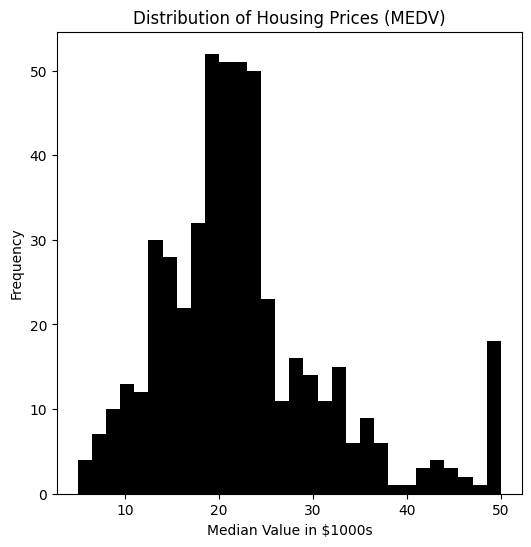

In [31]:
# Access the target variable 
labels = housing_data['MEDV']

# Create a histogram to visualize the distribution
plt.figure(figsize=(6, 6))
plt.hist(labels, bins=30, color='black')
plt.title("Distribution of Housing Prices (MEDV)")
plt.xlabel("Median Value in $1000s")
plt.ylabel("Frequency")
plt.show()

### 3. Partition the dataset into train, validation, and test sets.

In [32]:

from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = housing_data.drop(columns=['MEDV'])  
y = housing_data['MEDV']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Validation set shape: X_valid={}, y_valid={}".format(X_valid.shape, y_valid.shape))
print("Test set shape: X_test={}, y_test={}".format(X_test.shape, y_test.shape))


Training set shape: X_train=(404, 13), y_train=(404,)
Validation set shape: X_valid=(51, 13), y_valid=(51,)
Test set shape: X_test=(51, 13), y_test=(51,)


### 4. Normalise and standarize the data. Make sure to handle the missing or inconsistent data values if necessary.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Handle missing or inconsistent data values
imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)
X_test = imputer.transform(X_test)

# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# Standard Scaling (Z-score Normalization)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_valid = standard_scaler.transform(X_valid)
X_test = standard_scaler.transform(X_test)


## 3.2 MLP Regression Implementation from Scratch

In [27]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)
    

In [58]:
# Loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [121]:
# Define the derivative of activation functions
def sigmoid_derivative(self, x):
    return x * (1 - x)

def tanh_derivative(self, x):
    return 1 - x**2
    

def relu_derivative(self, x):
    return (x > 0).astype(int)

In [36]:
import numpy as np
import pandas as pd

class MLPRegression:
    def __init__(self, input_dim, hidden_layers, output_dim, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.activation = activation
        self.optimizer = optimizer

        # Initialize weights and biases for the layers
        self.initialize_parameters()

    def initialize_parameters(self):
        self.weights = []
        self.biases = []

        layers = [self.input_dim] + self.hidden_layers + [self.output_dim]

        for i in range(1, len(layers)):
            # Initialize weights with random values
            self.weights.append(np.random.randn(layers[i - 1], layers[i]))
            # Initialize biases with zeros
            self.biases.append(np.zeros((1, layers[i])))

    # Define activation functions
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'tanh':
            return self.tanh(x)
        elif self.activation == 'relu':
            return self.relu(x)

    # Define the derivative of activation functions
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def tanh_derivative(self, x):
        return 1 - x**2

    def relu_derivative(self, x):
        return (x > 0).astype(int)

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid_derivative(x)
        elif self.activation == 'tanh':
            return self.tanh_derivative(x)
        elif self.activation == 'relu':
            return self.relu_derivative(x)

    # Implement forward propagation
    def forward_propagation(self, x):
        self.layer_outputs = []
        input_data = x
        self.layer_outputs.append(input_data)

        for i in range(len(self.weights)):
            # Calculate the weighted sum of inputs
            weighted_sum = np.dot(input_data, self.weights[i]) + self.biases[i]
            # Apply the activation function
            layer_output = self.activation_function(weighted_sum)
            # Store the output for this layer
            self.layer_outputs.append(layer_output)
            input_data = layer_output

        return input_data

    # Implement backpropagation
    def backward_propagation(self, x, y, predicted):
        output_error = y - predicted
        deltas = [output_error * self.activation_derivative(predicted)]

        # Compute errors and deltas for each hidden layer
        for i in range(len(self.weights) - 1, 0, -1):
            error = deltas[-1].dot(self.weights[i].T)
            delta = error * self.activation_derivative(self.layer_outputs[i])
            deltas.append(delta)

        # Reverse the list of deltas
        deltas.reverse()

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] += self.layer_outputs[i].T.dot(deltas[i]) * self.learning_rate
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.learning_rate

    # Implement training
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(X)):
                x_sample = X[i]  # Individual input sample
                y_sample = y[i]  # Corresponding target value
                predicted = self.forward_propagation(x_sample)
                self.backward_propagation(x_sample, y_sample, predicted)
    
        

    def predict(self, X):
        return self.forward_propagation(X)


## 3.3 Model Training & Hyperparameter Tuning using W&B

### 1. Log your scores - loss (Mean Squared Error) on the validation set using W&B

In [63]:
import wandb

# Initialize W&B
wandb.init(project='assignment3-smai')

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0001, random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

# Inside training loop or after each epoch, calculate the MSE on the validation set
y_pred_valid = mlp.predict(X_valid)  

# Calculate MSE on the validation set
mse_valid = mean_squared_error(y_valid, y_pred_valid)

wandb.log({"MSE (Validation)": mse_valid})
wandb.finish()


MSE (Validation),▁
MSE (Validation),18.51132


### 2. Report metrics: MSE, RMSE, R-squared

In [66]:

# Initialize W&B run
wandb.init(project='assignment3-smai')

# Make predictions on the validation set
y_pred_valid = mlp.predict(X_valid)

# Calculate evaluation metrics (MSE, RMSE, R2) for the validation set
mse = mean_squared_error(y_valid, y_pred_valid)
rmse = np.sqrt(mse)
r2 = r_squared(y_valid, y_pred_valid) 

# Log the validation set scores to W&B
wandb.log({"Validation Set MSE": mse, "Validation Set RMSE": rmse, "Validation Set R-squared": r2})

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Finish the W&B run
wandb.finish()


Mean Squared Error (MSE): 18.51
Root Mean Squared Error (RMSE): 4.30
R-squared (R2) Score: 0.71


Validation Set MSE,▁
Validation Set R-squared,▁
Validation Set RMSE,▁
Validation Set MSE,18.51132
Validation Set R-squared,0.70753
Validation Set RMSE,4.30248


### 3. Report the scores(ordered) for all the combinations of : • Activation functions : sigmoid, tanh and ReLU and • Optimizers : SGD, batch gradient descent and mini-batch gradient descent 

In [54]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# List of activation functions and a list of optimizers
activation_functions = ['logistic', 'tanh', 'relu']
optimizers = ['sgd', 'adam', 'lbfgs']

# Initialize W&B
wandb.init(project='assignment3-smai')

# Loop over all combinations.
for activation in activation_functions:
    for optimizer in optimizers:
        
        mlp = MLPRegression(hidden_layer_sizes=(64, 32), activation=activation, solver=optimizer, random_state=42, max_iter=1000)
        mlp.fit(X_train, y_train)
        y_pred_valid = mlp.predict(X_valid)

        # Calculate evaluation metrics (MSE, RMSE, R2).
        mse = mean_squared_error(y_valid, y_pred_valid)
        rmse = np.sqrt(mse)
        r2 = r_squared(y_valid, y_pred_valid)

        # Log the scores for the current combination to W&B.
        wandb.log({
            "Activation Function": activation,
            "Optimizer": optimizer,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })

# Finish the W&B run.
wandb.finish()


/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_

MSE,▄▃▁▁▁▃▂▁█
R2,▅▆███▆▇█▁
RMSE,▄▄▁▁▂▃▂▂█
Activation Function,relu
MSE,49.7648
Optimizer,lbfgs
R2,0.21374
RMSE,7.05442


### 4. Tune your model on various hyperparameters, such as learning rate, epochs, and hidden layer neurons

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [2000, 3000]
}

# Create the MLPRegressor
mlp = MLPRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set with the best model
y_pred_valid = best_model.predict(X_valid)

# Calculate evaluation metrics (MSE, RMSE, R2)
mse = mean_squared_error(y_valid, y_pred_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_valid)

# Print the best parameters and scores
print("Best Parameters:", best_params)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (64, 64), 'learning_rate_init': 0.01, 'max_iter': 2000, 'solver': 'adam'}
MSE: 19.21087004614084
RMSE: 4.383020653172974
R-squared: 0.6964756778889947


## 3.4 Evaluating Model

### 1. Test your model on the test set and report loss score (MSE, RMSE, R-squared)

In [65]:
import wandb

# Initialize W&B run
wandb.init(project='assignment3-smai')

# Make predictions on the test set
y_pred_test = mlp.predict(X_test)

# Calculate evaluation metrics (MSE, RMSE, R2) for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r_squared(y_test, y_pred_test)

# Log the test set scores to W&B
wandb.log({"Test Set MSE": mse_test, "Test Set RMSE": rmse_test, "Test Set R-squared": r2_test})

# Print the test set scores
print("Test Set MSE:", mse_test)
print("Test Set RMSE:", rmse_test)
print("Test Set R-squared:", r2_test)

# Finish the W&B run
wandb.finish()


Test Set MSE: 7.075058633756864
Test Set RMSE: 2.6598982374814386
Test Set R-squared: 0.9147108974951788


Test Set MSE,▁
Test Set R-squared,▁
Test Set RMSE,▁
Test Set MSE,7.07506
Test Set R-squared,0.91471
Test Set RMSE,2.6599


# 4. CNN and AutoEncoders

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt  
import numpy as np

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)


100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 4.1 Data visualization and Preprocessing

### 1. Draw a graph that shows the distribution of the various labels across the entire dataset

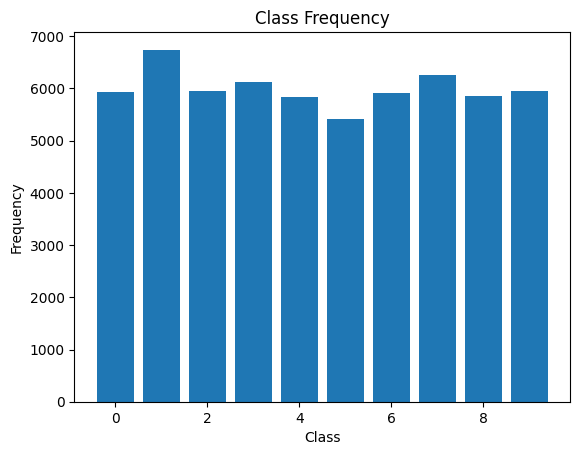

In [69]:
# Plotting the distribution of the various labels across the entire dataset
labels = trainset.targets.numpy()
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()  # Display the plot

### 2. Visualize several samples (say 5) of images from each class.

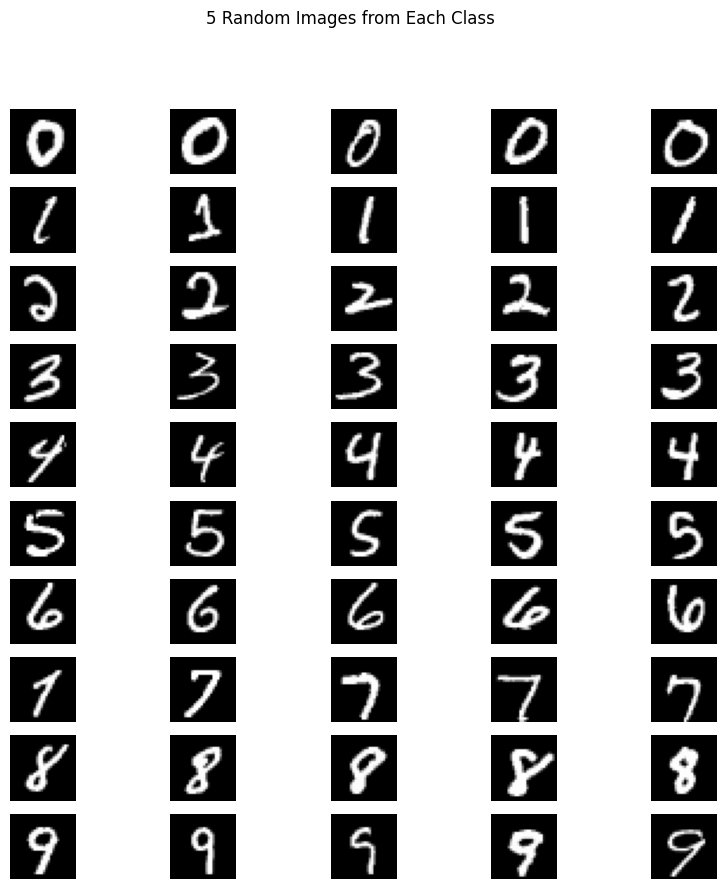

In [70]:
# Create a dictionary to store 5 images for each class
class_images = {i: [] for i in range(10)}

# Collect 5 random images for each class
for images, labels in trainloader:
    for image, label in zip(images, labels):
        if len(class_images[label.item()]) < 5:
            class_images[label.item()].append(image)

# Plot the collected images
fig, axs = plt.subplots(10, 5, figsize=(10, 10))

for i in range(10):
    for j in range(5):
        axs[i, j].imshow(class_images[i][j][0], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('5 Random Images from Each Class')
plt.show()

### 3. Check for any class imbalance and report.

Class 9: 1 samples (3.12%)
Class 3: 1 samples (3.12%)
Class 1: 1 samples (3.12%)
Class 9: 1 samples (3.12%)
Class 4: 1 samples (3.12%)
Class 8: 1 samples (3.12%)
Class 1: 1 samples (3.12%)
Class 2: 1 samples (3.12%)
Class 0: 1 samples (3.12%)
Class 2: 1 samples (3.12%)
Class 8: 1 samples (3.12%)
Class 4: 1 samples (3.12%)
Class 8: 1 samples (3.12%)
Class 2: 1 samples (3.12%)
Class 1: 1 samples (3.12%)
Class 7: 1 samples (3.12%)
Class 7: 1 samples (3.12%)
Class 0: 1 samples (3.12%)
Class 6: 1 samples (3.12%)
Class 6: 1 samples (3.12%)
Class 0: 1 samples (3.12%)
Class 3: 1 samples (3.12%)
Class 5: 1 samples (3.12%)
Class 8: 1 samples (3.12%)
Class 2: 1 samples (3.12%)
Class 0: 1 samples (3.12%)
Class 6: 1 samples (3.12%)
Class 0: 1 samples (3.12%)
Class 2: 1 samples (3.12%)
Class 8: 1 samples (3.12%)
Class 3: 1 samples (3.12%)
Class 4: 1 samples (3.12%)


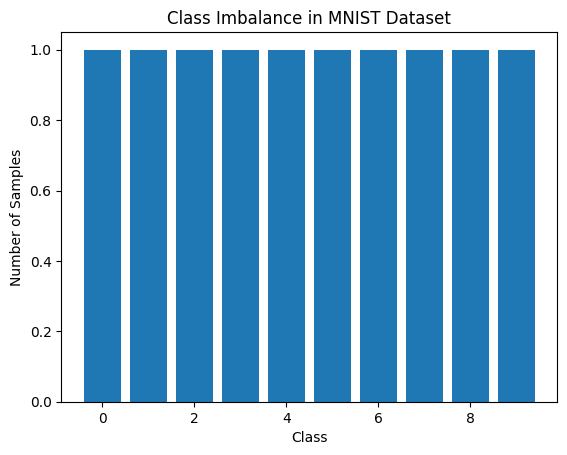

In [72]:
from collections import Counter

# Count the occurrences of each class
class_counts = dict(Counter(labels))

# Calculate the class imbalance
imbalance = {label: count / len(labels) for label, count in class_counts.items()}

# Display the class imbalance
for label, count in class_counts.items():
    print(f"Class {label}: {count} samples ({imbalance[label] * 100:.2f}%)")

# Plot the class imbalance
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Imbalance in MNIST Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

### 4. Partition the dataset into train, validation, and test sets.

In [76]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Define the sizes for the train, validation, and test sets
total_size = len(mnist_dataset)
train_size = int(0.6 * total_size)  # 60% for training
val_size = int(0.2 * total_size)    # 20% for validation
test_size = total_size - train_size - val_size

# Create random splits for train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(
    mnist_dataset, [train_size, val_size, test_size]
)

# Define data loaders for train, validation, and test sets
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check the sizes of the datasets
print(f"Training set size: {len(train_dataset)} samples")
print(f"Validation set size: {len(val_dataset)} samples")
print(f"Test set size: {len(test_dataset)} samples")

Training set size: 36000 samples
Validation set size: 12000 samples
Test set size: 12000 samples


### 5. Write a function to visualize the feature maps. Your code should be able to visualize feature maps of a trained model for any layer of the given image.

In [77]:
"""
Visualize feature maps of a trained model for a specific layer.

Args:
- model: The trained CNN model.
- image: Input image for which to visualize feature maps.
- layer_name: The name or index of the layer for which to visualize feature maps.
- num_maps: Number of feature maps to visualize.

Returns:
- None (displays the feature maps using Matplotlib).
"""

def visualize_feature_maps(model, image, layer_name, num_maps=5):
    # Set the model in evaluation mode
    model.eval()

    # Create a feature extraction model up to the specified layer
    feature_extractor = torch.nn.Sequential(*list(model.children())[:layer_name])

    # Forward pass to get feature maps
    with torch.no_grad():
        feature_maps = feature_extractor(image)

    # Choose a random subset of feature maps to visualize
    if num_maps < feature_maps.size(1):
        selected_maps = torch.randint(0, feature_maps.size(1), (num_maps,))
        feature_maps = feature_maps[:, selected_maps, :, :]

    # Plot the feature maps
    plt.figure(figsize=(12, 6))
    for i in range(feature_maps.size(1)):
        plt.subplot(1, num_maps, i + 1)
        plt.imshow(feature_maps[0, i].cpu(), cmap='viridis')
        plt.title(f'Feature Map {i}')
        plt.axis('off')

    plt.show()

## 4.2 Model Building

In [ ]:
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Epoch 1/10, Train Loss: 240.1320, Train Acc: 92.11%, Validation Loss: 0.0548, Validation Acc: 98.25%
Epoch 2/10, Train Loss: 88.0721, Train Acc: 97.20%, Validation Loss: 0.0378, Validation Acc: 98.85%
Epoch 3/10, Train Loss: 64.5403, Train Acc: 97.96%, Validation Loss: 0.0302, Validation Acc: 99.07%
Epoch 4/10, Train Loss: 52.1588, Train Acc: 98.34%, Validation Loss: 0.0198, Validation Acc: 99.36%
Epoch 5/10, Train Loss: 44.4589, Train Acc: 98.58%, Validation Loss: 0.0156, Validation Acc: 99.50%
Epoch 6/10, Train Loss: 40.9387, Train Acc: 98.69%, Validation Loss: 0.0129, Validation Acc: 99.59%
Epoch 7/10, Train Loss: 34.1238, Train Acc: 98.87%, Validation Loss: 0.0095, Validation Acc: 99.70%
Epoch 8/10, Train Loss: 29.6087, Train Acc: 99.04%, Validation Loss: 0.0080, Validation Acc: 99.75%
Epoch 9/10, Train Loss: 27.4875, Train Acc: 99.07%, Validation Loss: 0.0070, Validation Acc: 99.79%
Epoch 10/10, Train Loss: 23.9935, Train Acc: 99.22%, Validation Loss: 0.0057, Validation Acc: 99.81

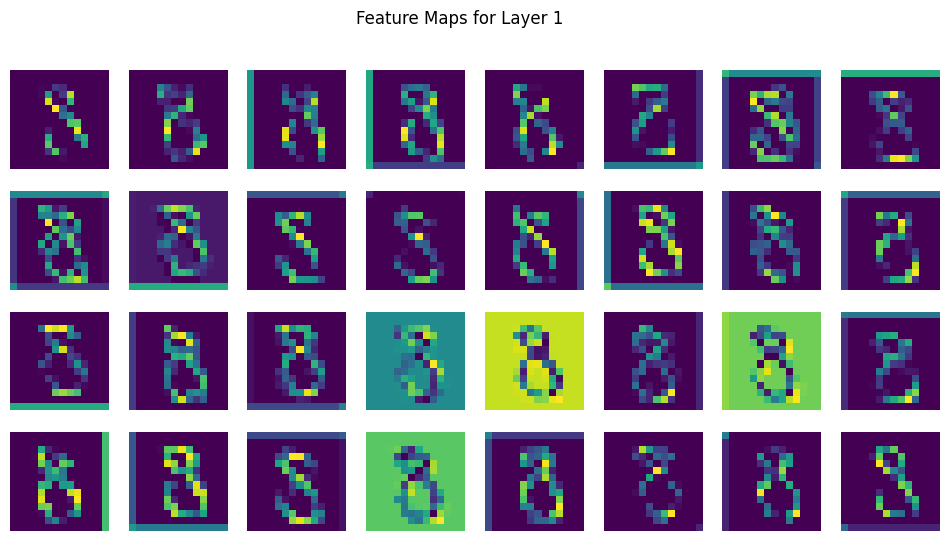

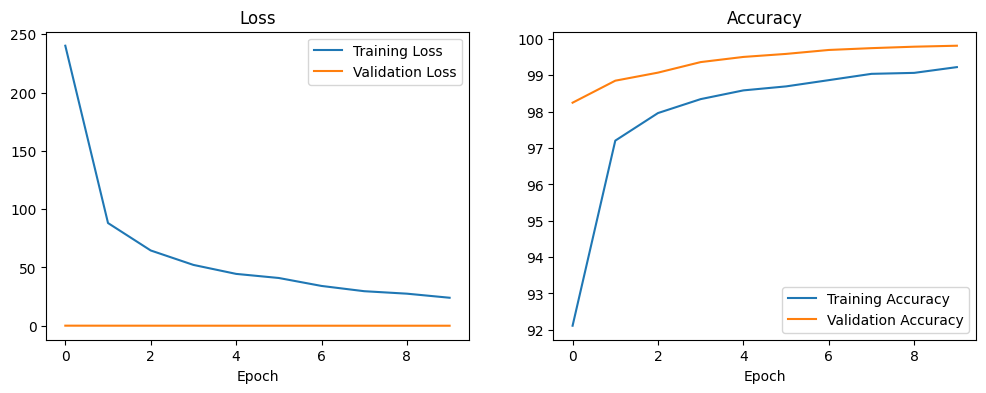

In [105]:
import torch.nn as nn
import torch.optim as optim

model = BaselineCNN().to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    return running_loss, accuracy

def validate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    average_loss = running_loss / len(dataloader)

    return average_loss, accuracy

# Training loop
num_epochs = 10
train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, trainloader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Acc: {val_accuracy:.2f}%")

# Display Feature Maps
def visualize_feature_maps(data, layer_index):
    model.eval()  # Set the model to evaluation mode

    activations = model.pool1(model.relu1(model.conv1(data)))
    activations = activations.detach().cpu().numpy()  # Use detach() to remove gradients
    model.train()  # Set the model back to training mode

    plt.figure(figsize=(12, 6))
    for i in range(32):  # Visualize the feature maps from the first batch
        plt.subplot(4, 8, i + 1)
        plt.imshow(activations[0, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps for Layer {layer_index}")
    plt.show()

# Select a random batch of data and visualize feature maps for the first layer
sample_data, _ = next(iter(trainloader))
visualize_feature_maps(sample_data.to(device), 1)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

## 4.3 Hyperparameter Tuning and Evaluation

### 1. Use W&B to facilitate hyperparameter tuning. Experiment with various architectures and hyperparameters: learning rate, batch size, kernel sizes (filter size), strides, number of epochs, and dropout rates

In [106]:
import wandb

# Initialize W&B
wandb.init(project="assignment3-smai")

# Define hyperparameters for tuning
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 64
config.kernel_size = 3
config.epochs = 10
config.dropout_rate = 0.5

# Initialize the model, loss function, and optimizer
model = BaselineCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

# Training loop
num_epochs = config.epochs
train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, trainloader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Acc: {val_accuracy:.2f}%")

# Finish the W&B run
wandb.finish()


Epoch 1/10, Train Loss: 219.5006, Train Acc: 92.81%, Validation Loss: 0.0507, Validation Acc: 98.44%
Epoch 2/10, Train Loss: 78.7054, Train Acc: 97.53%, Validation Loss: 0.0311, Validation Acc: 99.02%
Epoch 3/10, Train Loss: 60.4261, Train Acc: 98.06%, Validation Loss: 0.0233, Validation Acc: 99.28%
Epoch 4/10, Train Loss: 49.2154, Train Acc: 98.40%, Validation Loss: 0.0183, Validation Acc: 99.42%
Epoch 5/10, Train Loss: 40.5488, Train Acc: 98.70%, Validation Loss: 0.0171, Validation Acc: 99.45%
Epoch 6/10, Train Loss: 36.3484, Train Acc: 98.81%, Validation Loss: 0.0119, Validation Acc: 99.61%
Epoch 7/10, Train Loss: 33.9710, Train Acc: 98.90%, Validation Loss: 0.0089, Validation Acc: 99.71%
Epoch 8/10, Train Loss: 29.3027, Train Acc: 99.03%, Validation Loss: 0.0076, Validation Acc: 99.75%
Epoch 9/10, Train Loss: 26.4319, Train Acc: 99.06%, Validation Loss: 0.0059, Validation Acc: 99.81%
Epoch 10/10, Train Loss: 22.9924, Train Acc: 99.22%, Validation Loss: 0.0066, Validation Acc: 99.77

### 2. Compare the effect of using and not using dropout layers

In [83]:
class CNNWithoutDropout(nn.Module):
    def __init__(self):
        super(CNNWithoutDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x


In [85]:
# Train the model without dropout layers
model_without_dropout = CNNWithoutDropout().to(device)
optimizer_without_dropout = optim.Adam(model_without_dropout.parameters(), lr=config.learning_rate)

wandb.init(project="assignment3-smai")

def train_without_dropout(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    return running_loss, accuracy

# Training loop for the model without dropout
num_epochs = config.epochs
train_losses_no_dropout, train_accuracies_no_dropout, val_losses_no_dropout, val_accuracies_no_dropout = [], [], [], []

for epoch in range(num_epochs):
    train_loss_no_dropout, train_accuracy_no_dropout = train_without_dropout(model_without_dropout, trainloader, optimizer_without_dropout, criterion)
    val_loss_no_dropout, val_accuracy_no_dropout = validate(model_without_dropout, trainloader, criterion)

    train_losses_no_dropout.append(train_loss_no_dropout)
    train_accuracies_no_dropout.append(train_accuracy_no_dropout)
    val_losses_no_dropout.append(val_loss_no_dropout)
    val_accuracies_no_dropout.append(val_accuracy_no_dropout)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss (no dropout): {train_loss_no_dropout:.4f}, Train Acc (no dropout): {train_accuracy_no_dropout:.2f}%, Validation Loss (no dropout): {val_loss_no_dropout:.4f}, Validation Acc (no dropout): {val_accuracy_no_dropout:.2f}%")

# Save metrics for the model without dropout
wandb.log({"train_loss_no_dropout": train_loss_no_dropout, "train_accuracy_no_dropout": train_accuracy_no_dropout,
           "val_loss_no_dropout": val_loss_no_dropout, "val_accuracy_no_dropout": val_accuracy_no_dropout})


Epoch 1/10, Train Loss (no dropout): 146.5778, Train Acc (no dropout): 95.18%, Validation Loss (no dropout): 55.6659, Validation Acc (no dropout): 98.08%
Epoch 2/10, Train Loss (no dropout): 43.3328, Train Acc (no dropout): 98.59%, Validation Loss (no dropout): 33.6905, Validation Acc (no dropout): 98.86%
Epoch 3/10, Train Loss (no dropout): 29.4051, Train Acc (no dropout): 99.05%, Validation Loss (no dropout): 19.6676, Validation Acc (no dropout): 99.32%
Epoch 4/10, Train Loss (no dropout): 20.5276, Train Acc (no dropout): 99.30%, Validation Loss (no dropout): 12.0633, Validation Acc (no dropout): 99.60%
Epoch 5/10, Train Loss (no dropout): 16.2055, Train Acc (no dropout): 99.43%, Validation Loss (no dropout): 12.4197, Validation Acc (no dropout): 99.58%
Epoch 6/10, Train Loss (no dropout): 12.1742, Train Acc (no dropout): 99.57%, Validation Loss (no dropout): 18.0395, Validation Acc (no dropout): 99.32%
Epoch 7/10, Train Loss (no dropout): 10.1397, Train Acc (no dropout): 99.63%, Val

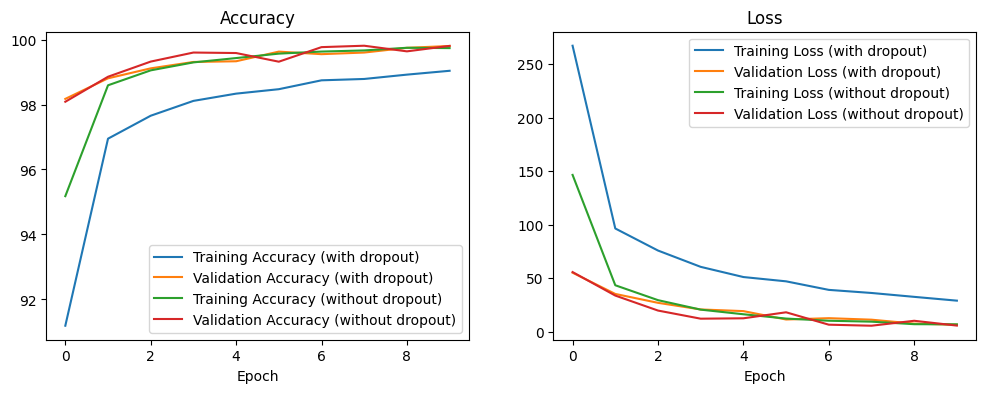

In [86]:
# Compare results
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy (with dropout)')
plt.plot(val_accuracies, label='Validation Accuracy (with dropout)')
plt.plot(train_accuracies_no_dropout, label='Training Accuracy (without dropout)')
plt.plot(val_accuracies_no_dropout, label='Validation Accuracy (without dropout)')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss (with dropout)')
plt.plot(val_losses, label='Validation Loss (with dropout)')
plt.plot(train_losses_no_dropout, label='Training Loss (without dropout)')
plt.plot(val_losses_no_dropout, label='Validation Loss (without dropout)')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')

plt.show()


### 3. Log training/validation loss and accuracy, confusion matrices, and class-specific metrics using W&B

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

wandb.init(project="assignment3-smai")

# Define hyperparameters
config = wandb.config
config.learning_rate = 0.001
config.epochs = 10
config.batch_size = 64

# Initialize the model, loss function, and optimizer
model = BaselineCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

# Training 
for epoch in range(config.epochs):
    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, trainloader, criterion)

    # Log training and validation metrics
    wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy, "val_loss": val_loss, "val_accuracy": val_accuracy})

# Create confusion matrix and class-specific metrics
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute and log confusion matrix
confusion = confusion_matrix(all_labels, all_predictions, labels=list(range(10)))
wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(probs=None, y_true=all_labels, preds=all_predictions, class_names=[str(i) for i in range(10)])})

# Compute and log class-specific metrics (precision, recall, F1-score)
class_metrics = classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(10)], output_dict=True)
wandb.log({"class_metrics": class_metrics})


train_accuracy_no_dropout,▁
train_loss_no_dropout,▁
val_accuracy_no_dropout,▁
val_loss_no_dropout,▁
train_accuracy_no_dropout,99.73667
train_loss_no_dropout,6.76335
val_accuracy_no_dropout,99.805
val_loss_no_dropout,5.60313


## 4.4 Model Evaluation and Analysis

### 1. Evaluate your best model on the test set and report accuracy, per-class accuracy, and classification report

In [90]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
best_model = BaselineCNN()

# Define training configuration
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the optimizer and loss function
optimizer = optim.Adam(best_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
best_accuracy = 0.0


batch_size = 64

# Create a DataLoader for the validation dataset
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Create a DataLoader for the test dataset
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Training loop
for epoch in range(num_epochs):
    best_model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    best_model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = best_model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy:.2f}%")

    # Check if the current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        # Update the best model
        best_model.load_state_dict(best_model.state_dict())  # Update the best_model

print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

best_model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = outputs.max(1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate per-class accuracy
class_accuracy = []
for class_label in range(10):
    class_indices = [i for i, label in enumerate(true_labels) if label == class_label]
    class_true_labels = np.array(true_labels)[class_indices]
    class_predicted_labels = np.array(predicted_labels)[class_indices]
    class_acc = accuracy_score(class_true_labels, class_predicted_labels)
    class_accuracy.append(class_acc)
    print("Class {} Accuracy: {:.2f}%".format(class_label, class_acc * 100))


report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)


Epoch 1/10, Validation Accuracy: 98.40%
Epoch 2/10, Validation Accuracy: 98.87%
Epoch 3/10, Validation Accuracy: 99.23%
Epoch 4/10, Validation Accuracy: 99.39%
Epoch 5/10, Validation Accuracy: 99.56%
Epoch 6/10, Validation Accuracy: 99.62%
Epoch 7/10, Validation Accuracy: 99.68%
Epoch 8/10, Validation Accuracy: 99.78%
Epoch 9/10, Validation Accuracy: 99.75%
Epoch 10/10, Validation Accuracy: 99.83%
Best Validation Accuracy: 99.83%
Test Accuracy: 99.74%
Class 0 Accuracy: 100.00%
Class 1 Accuracy: 99.93%
Class 2 Accuracy: 99.67%
Class 3 Accuracy: 99.67%
Class 4 Accuracy: 99.83%
Class 5 Accuracy: 99.91%
Class 6 Accuracy: 99.25%
Class 7 Accuracy: 99.92%
Class 8 Accuracy: 99.75%
Class 9 Accuracy: 99.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1187
           1       1.00      1.00      1.00      1338
           2       1.00      1.00      1.00      1204
           3       1.00      1.00      1.00      1209

### 2. Provide a clear visualization of the model’s performance, e.g., confusion matrix.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1187
           1       1.00      1.00      1.00      1338
           2       1.00      1.00      1.00      1204
           3       1.00      1.00      1.00      1209
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00      1067
           6       1.00      0.99      1.00      1205
           7       0.99      1.00      1.00      1248
           8       1.00      1.00      1.00      1185
           9       1.00      0.99      1.00      1198

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



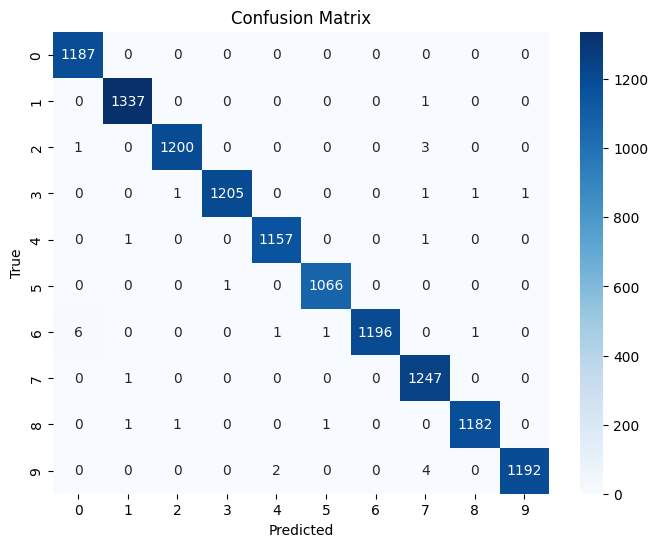

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and print a classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### 3. Identify a few instances where the model makes incorrect predictions and analyze possible reasons behind these misclassifications.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in testloader:  # Use the test data loader
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)


First identify a few random misclassified instances by comparing the true labels with the predicted labels. Then visualize these misclassified instances along with their true and predicted labels.

By analyzing these misclassified instances, one can gain insights into why the model made incorrect predictions. Common reasons for misclassifications can include:

- Ambiguity in the data: Some images may be inherently ambiguous and difficult to classify correctly, even for humans.

- Noise in the data: In real-world data, there can be noise or anomalies that make classification more challenging.

- Model limitations: The model architecture, training data, and hyperparameters can affect its performance. Misclassifications may occur if the model is not sufficiently complex or if the training data is insufficient.

- Data preprocessing: Inadequate or incorrect data preprocessing can affect the model's ability to correctly classify images.

## 4.5 Train on Noisy Dataset

### Data processing and splitting

In [ ]:
import scipy.io
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

# Load the noisy MNIST dataset
mat_data = scipy.io.loadmat('/home/sruj/Downloads/mnist-with-awgn.mat')
noisy_images_train = mat_data['train_x'].astype(np.float32)
noisy_images_test = mat_data['test_x'].astype(np.float32)

# Reshape the data to have the correct shape
noisy_images_train = noisy_images_train.reshape(-1, 1, 28, 28)
noisy_images_test = noisy_images_test.reshape(-1, 1, 28, 28)

# Access noisy labels
labels_train = mat_data['train_y'].astype(np.int64)
labels_test = mat_data['test_y'].astype(np.int64)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(noisy_images_train, labels_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Convert data to PyTorch tensors
X_train, X_val, X_test = torch.tensor(X_train), torch.tensor(X_val), torch.tensor(X_test)
y_train, y_val, y_test = torch.tensor(y_train), torch.tensor(y_val), torch.tensor(y_test)

batch_size = 64

# Create data loaders for the training, validation, and test sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Training the model on noisy dataset

In [ ]:
# Define the training configuration
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize your model
best_model = BaselineCNN().to(device)

# Define the optimizer and loss function
optimizer = optim.Adam(best_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Initialize variables to track the best model
best_accuracy = 0.0

# Training loop
for epoch in range(num_epochs):
    best_model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = best_model(inputs)
        labels = labels.long()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    best_model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = best_model(inputs)
         
            labels = labels.long()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy:.2f}%")

    # Check if the current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        # Update the best model
        best_model.load_state_dict(best_model.state_dict())  # Load the best model's state dict

In [ ]:
print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

best_model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = outputs.max(1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Per-class accuracy
class_accuracy = []
for class_label in range(10):
    class_indices = [i for i, label in enumerate(true_labels) if label == class_label]
    class_true_labels = np.array(true_labels)[class_indices]
    class_predicted_labels = np.array(predicted_labels)[class_indices]
    class_acc = accuracy_score(class_true_labels, class_predicted_labels)
    class_accuracy.append(class_acc)
    print("Class {} Accuracy: {:.2f}%".format(class_label, class_acc * 100))

# Generate and print a classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)


### 2. Report validation losses, validation scores, training losses, training scores.

In [ ]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training 
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, valloader, criterion)  # Use the validation data loader

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Acc: {val_accuracy:.2f}%")

# PLotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()


### 3. Evaluate your model on test data and print the classification report.

In [ ]:
# Set the model to evaluation mode
model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:  
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)


# 5. Some Other Variants

## 5.1 Multi-digit Recognition on Multi-MNIST Dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Define the path to the dataset folders
train_folder = '/home/sruj/Downloads/double_mnist_seed_123_image_size_64_64/train'  
test_folder = '/home/sruj/Downloads/double_mnist_seed_123_image_size_64_64/test'    
val_folder = '/home/sruj/Downloads/double_mnist_seed_123_image_size_64_64/val'    

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img = tf.keras.preprocessing.image.load_img(
                    os.path.join(subfolder_path, filename),
                    color_mode="grayscale",
                    target_size=(64, 64)
                )
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(int(subfolder))
    return np.array(images), np.array(labels)

# Load and preprocess the data from the train, test, and val folders
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)
val_images, val_labels = load_images_from_folder(val_folder)

# Normalize pixel values to [0, 1]
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0, val_images / 255.0

# Define the MLP model
model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_data, val_data, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)

# Train
history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


2023-10-23 17:14:05.526241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 17:14:12.565091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 17:14:33.020179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 5.2 Permuted MNIST

### 5.2.1 MLP on Permuted-MNIST

In [9]:
# MLP model class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_size, output_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.ModuleList()
        for _ in range(hidden_layers):
            self.hidden_layers.append(nn.Linear(input_size, hidden_size))
            input_size = hidden_size
        self.output_layer = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        x = self.flatten(x)
        for layer in self.hidden_layers:
            x = nn.functional.relu(layer(x))
        x = self.output_layer(x)
        return x

In [ ]:
# Hyperparameter tuning: Adjust the number of hidden layers and neurons
best_model = None
best_accuracy = 0.0

hidden_layers_range = [1, 2, 3]  # Number of hidden layers
neurons_per_layer_range = [64, 128, 256]  # Number of neurons in each hidden layer

for hidden_layers in hidden_layers_range:
    for neurons_per_layer in neurons_per_layer_range:
        # Define and train the model
        model = MLP(input_size=28 * 28, hidden_layers=hidden_layers, hidden_size=neurons_per_layer, output_size=10)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        x_train_tensor = torch.tensor(permuted_x_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
        x_val_tensor = torch.tensor(permuted_x_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.int64)
        
        num_epochs = 10
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(x_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set
        model.eval()
        with torch.no_grad():
            outputs = model(x_val_tensor)
            _, predicted = torch.max(outputs, 1)
            val_accuracy = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)

        if val_accuracy > best_accuracy:
            best_model = model
            best_accuracy = val_accuracy

# Evaluate the best model on the test set
x_test_tensor = torch.tensor(permuted_x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
# Training and evaluation functions
def train_and_evaluate(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    model.eval()
    
    correct_train, total_train = 0, 0
    for inputs, labels in train_loader:
        outputs = model(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    correct_val, total_val = 0, 0
    for inputs, labels in val_loader:
        outputs = model(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    val_accuracy = 100 * correct_val / total_val

    return train_accuracy, val_accuracy

# Test accuracy function
def test_accuracy(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.unsqueeze(1))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [13]:
mlp_model = MLP(input_size=28 * 28, hidden_layers=2, hidden_size=128, output_size=10)
mlp_train_accuracy, mlp_val_accuracy = train_and_evaluate(mlp_model, train_loader, val_loader)
mlp_test_accuracy = test_accuracy(mlp_model, test_loader)

# Results
print("Train Accuracy: {:.2f}%".format(mlp_train_accuracy))
print("Validation Accuracy: {:.2f}%".format(mlp_val_accuracy))
print("Test Accuracy: {:.2f}%".format(mlp_test_accuracy))


Train Accuracy: 99.50%
Validation Accuracy: 97.78%
Test Accuracy: 97.65%


### 5.2.2 CNN on Permuted-MNIST

In [8]:
# CNN model
class CNN(nn.Module):
    def __init__(self, num_classes, dropout_prob):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 5 * 5)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 10
batch_size = 64
dropout_prob = 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(permuted_x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
x_val_tensor = torch.tensor(permuted_x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.int64)
x_test_tensor = torch.tensor(permuted_x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

# Create data loaders
train_data = TensorDataset(x_train_tensor, y_train_tensor)
val_data = TensorDataset(x_val_tensor, y_val_tensor)
test_data = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Initialize the CNN model
model = CNN(num_classes=10, dropout_prob=dropout_prob)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training 
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))  # Add the channel dimension
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [9]:

# Evaluation
model.eval()
correct_train, total_train = 0, 0
for inputs, labels in train_loader:
    outputs = model(inputs.unsqueeze(1))
    _, predicted = torch.max(outputs, 1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

correct_val, total_val = 0, 0
for inputs, labels in val_loader:
    outputs = model(inputs.unsqueeze(1))
    _, predicted = torch.max(outputs, 1)
    total_val += labels.size(0)
    correct_val += (predicted == labels).sum().item()

correct_test, total_test = 0, 0
for inputs, labels in test_loader:
    outputs = model(inputs.unsqueeze(1))
    _, predicted = torch.max(outputs, 1)
    total_test += labels.size(0)
    correct_test += (predicted == labels).sum().item()

train_accuracy = correct_train / total_train
val_accuracy = correct_val / total_val
test_accuracy = correct_test / total_test

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Train Accuracy: 0.99
Validation Accuracy: 0.97
Test Accuracy: 0.97


### 5.3 Analysis

In [12]:
mlp_model = MLP(input_size=28 * 28, hidden_layers=2, hidden_size=128, output_size=10)
cnn_model = CNN(num_classes=10, dropout_prob=0.5)

# MLP
mlp_train_accuracy, mlp_val_accuracy = train_and_evaluate(mlp_model, train_loader, val_loader)

# CNN
cnn_train_accuracy, cnn_val_accuracy = train_and_evaluate(cnn_model, train_loader, val_loader)

# Evaluate on test set
mlp_test_accuracy = test_accuracy(mlp_model, test_loader)
cnn_test_accuracy = test_accuracy(cnn_model, test_loader)

# Results
print("MLP Model Train Accuracy: {:.2f}%".format(mlp_train_accuracy))
print("MLP Model Validation Accuracy: {:.2f}%".format(mlp_val_accuracy))
print("MLP Model Test Accuracy: {:.2f}%".format(mlp_test_accuracy))
print("CNN Model Train Accuracy: {:.2f}%".format(cnn_train_accuracy))
print("CNN Model Validation Accuracy: {:.2f}%".format(cnn_val_accuracy))
print("CNN Model Test Accuracy: {:.2f}%".format(cnn_test_accuracy))


MLP Model Train Accuracy: 99.54%
MLP Model Validation Accuracy: 97.86%
MLP Model Test Accuracy: 97.75%
CNN Model Train Accuracy: 98.60%
CNN Model Validation Accuracy: 97.12%
CNN Model Test Accuracy: 97.19%
